# 重心動揺計を用いた生体計測
重心動揺計計測器とは
- 平面上の二等辺三角形のプレートの3つの頂点に垂直荷重センサを置く。
- それぞれにかかる荷重量から荷重がかかっている中点を求める。
- 上下に運動しない剛体という前提で計測をした場合，重心の運動を表すことでもあるので，「重心動揺計」と言われる。しかし，本当に計測しているのは，「平面(x-y平面)の足圧中心位置」であることを知っておかなければならない。

原理
- てこの原理を応用してある中心点Pを求める。
- 実際に点$P$を求める前に$\cdots$
- 原点Oから2つの点までの距離をそれぞれ$L_1$，$L_2$，その点にかかる荷重量を$W_1$，$W_2$とする。
- もし，この状態が保持されている場合（静止している場合），次の式が成り立つ。<br>
<font color="red">$W_1\times L_1-W_2\times L_2 = 0$ </font>
- この式を用いて，圧中心座標点を計算する。それを，ある時刻ごとに記録したのが，[重心動揺](https://www.youtube.com/watch?v=ban8K3j4k1g)
（ワシが3,4年前に作った！）である。
- 以上のことを動画にすると[こんな感じ](https://youtu.be/pv8deh6Za7Y)？


# 必要なライブラリをインポートする
- 以下の通り，セルに書いて走らせる。そのままコピペする。
```
import numpy as np        
## 数値計算に特化したライブラリ（ソフトみたいなもの）
```
```
import pandas as pd       
## データフレームの操作に特化したライブラリ（ソフトみたいなもの）
```
```
import matplotlib.pyplot as plt  
## 図の作成に特化したライブラリ（ソフトみたいなもの）
```
```
%matplotlib inline        
## jupyter notebook内に図を表示するためのマジックコマンド
```

In [48]:
## ライブラリのインポート ##
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats


# 解析をする前に

デジタル計測機器はノイズと言って，**処理対象となる情報以外の不要な情報(数値)**が入る。その情報を可能な限り除去し，真の値を抽出しなければならない。<br>
それを周波数の違いによって分類・除去するのが一般的であり，医療系分野ではフィルタリングとしてよく言う。<br>その手法は多くあり，データの計測方法や対象によって異なる。<br>
ここでは，高速フーリエ変換という手法を用いることを前提に話を進める。

## 10kgの錘を重心動揺計に置き，計測する。

重心動揺計の計測プレートの上に重錘10kgを置いて，60秒間，100Hzで計測した。その時に記録したデータを読み込み，表示する。<br>

In [23]:
dat = pd.read_csv("./Weight10/pt0419_1.csv",skiprows=6,encoding="shift-jis")

In [24]:
## このデータの中身の最初を表示する
dat.head()

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0.00,-0.061,1.316,---.---,---.---,10.009,---.---,---.---,---.---,NaN,NaN,NaN,NaN
1,0.01,-0.061,1.316,---.---,---.---,10.009,---.---,---.---,---.---,NaN,NaN,NaN,NaN
2,0.02,-0.061,1.316,---.---,---.---,10.009,---.---,---.---,---.---,NaN,NaN,NaN,NaN
3,0.03,-0.073,1.324,---.---,---.---,10.004,---.---,---.---,---.---,NaN,NaN,NaN,NaN
4,0.04,-0.073,1.324,---.---,---.---,10.004,---.---,---.---,---.---,NaN,NaN,NaN,NaN


In [25]:
## このデータの中身の最後の一部を表示する
dat.tail()

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
5996,59.96,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN
5997,59.97,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN
5998,59.98,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN
5999,59.99,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN
6000,60.00,-0.049,1.308,---.---,---.---,10.014,---.---,---.---,---.---,NaN,NaN,NaN,NaN


(array([ 369.,    0.,    0., 1370.,    0.,    0., 2157.,    0.,    0.,
        2105.]),
 array([-0.085 , -0.0814, -0.0778, -0.0742, -0.0706, -0.067 , -0.0634,
        -0.0598, -0.0562, -0.0526, -0.049 ]),
 <a list of 10 Patch objects>)

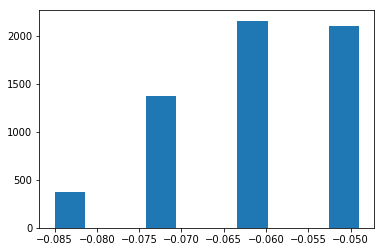

In [26]:
# x軸方向のデータは？？
plt.hist(dat.iloc[:,1])

(array([2105.,    0.,    0., 2157.,    0.,    0., 1370.,    0.,    0.,
         369.]),
 array([1.308 , 1.3103, 1.3126, 1.3149, 1.3172, 1.3195, 1.3218, 1.3241,
        1.3264, 1.3287, 1.331 ]),
 <a list of 10 Patch objects>)

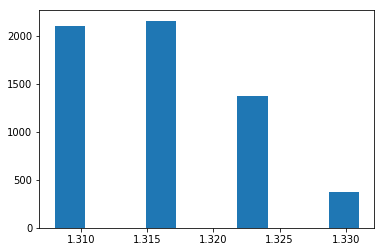

In [27]:
# y軸方向のデータは？？
plt.hist(dat.iloc[:,2])

In [28]:
def FFT(a,wave,bias):
    '''
    高速フーリエ変換
    '''
    xfft = np.fft.fft(a, n=None, axis=-1, norm=None)
    xfft[wave:(-1)*wave]=0
    if bias:
        xfft[0]=0
    xifft = np.fft.ifft(xfft)
    return xifft.real

In [45]:
myd = dat.iloc[:,1:3].values

if np.log2(myd.shape[0])*10%10!=0:
    nn = np.log2(myd.shape[0])*10//10
    print(nn)
    myd = myd[0:(pow(2,int(nn))+0),:]

## 10HzのLow pass
ww = int(myd.shape[0]*10/(1/0.01))  ## データ数：１/サンプル間隔(Hz)＝波数:周波数(Hz)
                                        # hz = np.linspace(0,1.0/samp,myd.shape[0])[wave]

# x方向，y方向
x = FFT(myd[:,0],ww,False)
y = FFT(myd[:,1],ww,False)

12.0


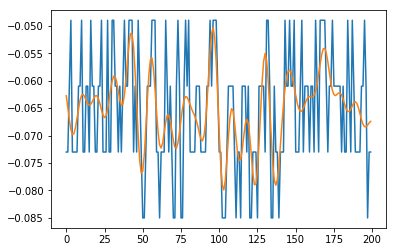

In [46]:
plt.plot(myd[100:300,0])
plt.plot(x[100:300])

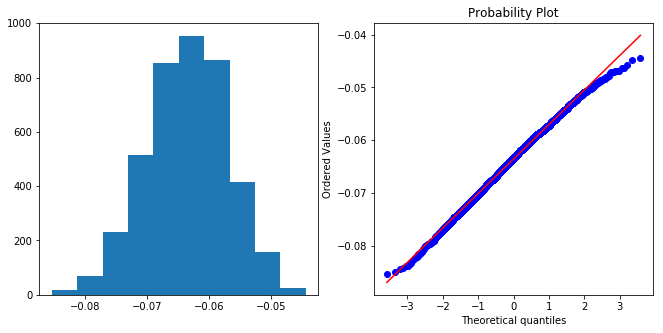

In [55]:
# ノイズ処理したデータのヒストグラムとqqplot
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(11,5))
ax1.hist(x)
ax2 = stats.probplot(x,dist="norm",plot=plt)

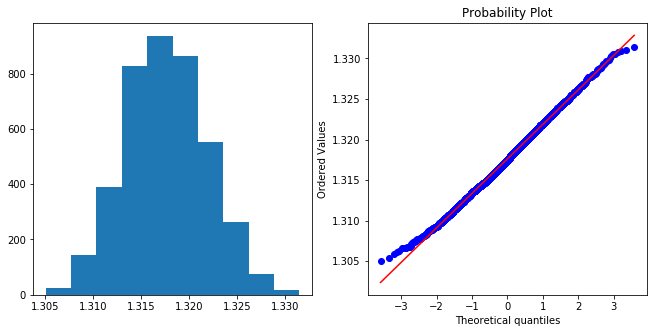

In [57]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(11,5))
ax1.hist(y)
ax2 = stats.probplot(y,dist="norm",plot=plt)

さて，どうだろうか？<br>
いずれにせよ，計測機器の特性を捉える必要がある！！<br>
いきなり計測するのではなく，単純なモデルから順序立てて計測することが必要である。

# 自分のデータを読み込む
 - データの中身にいらない情報があるのでそれを省く。
 - 今必要なデータは時間，x方向およびy方向の圧中心位置，計3つの値である。
 - これらのデータフレームを作成する。
 - データフレームの大きさを見る("object名.shape")。

In [9]:
dat = pd.read_csv("20180302_8.csv",skiprows=6,encoding="shift-jis")
dat.head()
## 使うのは左の３列。

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf)
0,0.00,-0.603,-5.342,-17.557,-5.011,26.879,14.595,-5.640,29.983
1,0.01,-0.592,-5.342,-17.566,-4.996,26.860,14.599,-5.650,30.012
2,0.02,-0.591,-5.345,-17.566,-4.996,26.860,14.596,-5.657,30.022
3,0.03,-0.591,-5.345,-17.566,-4.996,26.860,14.596,-5.657,30.022
4,0.04,-0.574,-5.340,-17.556,-4.998,26.850,14.603,-5.645,30.041


# データか適切に読み込めているか確認する
- 確認の方法は様々だが，図示するのか一番よい。
- <font color="red">plt.plot(自分のデータ)，plt.hist(自分のデータ) </font>とする。

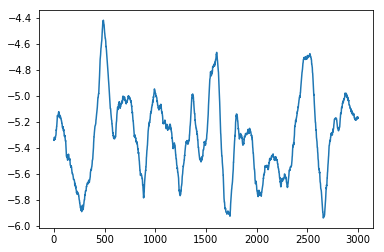

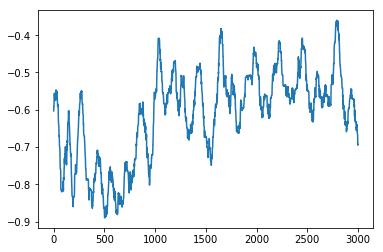

In [14]:
fig = plt.figure()
plt.plot(dat.iloc[:,2])
fig = plt.figure()
plt.plot(dat.iloc[:,1])

# 圧中心変化を図示する。
- plt.plot(x方向の値, y方向の値)

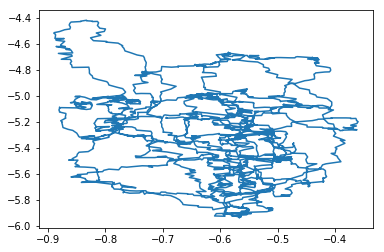

In [15]:
x = dat.iloc[:,1]
y = dat.iloc[:,2]
plt.plot(x,y)

# 以上の処理を二つのデータに施し，図を並べる。
- 図の並べ方は色々方法がある。
- ここでは二つのデータを比較したいので，単純に重ねる。
```
plt.plot(1回目のデータ, color="p")
plt.plot(2回目のデータ, color="g")
```
- あとは縦軸，横軸を合わせる。
```
plt.xlim(number1,number2)
plt.ylim(number1,number2)
```
- これを同じセル内に書いて，きれいになった！（人に見せられる）と思うまで行う

(-6, -4)

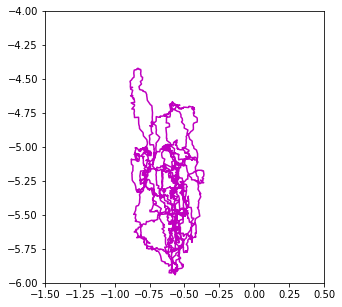

In [21]:
fig = plt.figure(figsize=(5,5))
plt.plot(x,y, color="m")
#plt.plot("2回目のデータ", color="g")
plt.xlim(-1.5,0.5)
plt.ylim(-6,-4)
## "number1","number2"はx,yのrangeが同じになるように姉弟する。

# 波形の補正
- 必要そうな処理プログラムを以下に載せる。

In [ ]:

## フィルタリング（ローパス）とバイアス ##
###  必ず使用する  ###
def FFT_cop(**ss):
    """
    フィルタリング（ローパス）とバイアス
    処理したデータが適切か図示して確認する
    df:FFTしたいデータ
    freq:パスしたい周波数(Hz)
    bias：取りたい場合はFalseをTrueに変える
    start:開始点
    end:終了点
    （もし，startとend間のデータ数が2のn乗個でない場合は自動的に2のn乗個にする）
    return:処理後のデータ，処理前（a）のデータ
    """
    
    v1 = ss["start"]
    v2 = ss["end"] 
    df = ss["df"]
   # wave = ss["wave"]
    bs = ss["bias"]
    samp = ss["sampling"]
    HZ = ss["hz"]
    
    myd = df[v1:v2,:]
    if np.log2(myd.shape[0])*10%10!=0:
        nn = np.log2(myd.shape[0])*10//10
        myd = df[v1:(2**int(nn)+v1),:]
    
    ww = int(myd.shape[0]*HZ/(1/samp))  ## データ数：１/サンプル間隔(Hz)＝波数:周波数(Hz)
                                        # hz = np.linspace(0,1.0/samp,myd.shape[0])[wave]
    x = FFT(myd[:,1],ww,bs)
    y = FFT(myd[:,2],ww,bs)    
    #x = FFT(myd[:,1],wave,bs)
    #y = FFT(myd[:,2],wave,bs)
    
   
    
    fig = plt.figure(figsize=(7,7))
    plt.plot(myd[:,1],myd[:,2])
    plt.plot(x,y)
    plt.title(f"The confirmation of a processing data on figure(wave:{ww})")
    
    return np.c_[myd[:,0],x,y]




## 主成分分析結果の取得 ##
###  必ず使用する  ###
def COPpca(dat):
    '''
    COPデータで主軸変換，次元削減のためのパラメータを抽出する。
    返り値：（固有ベクトル，固有ベクトルの角度，変換前のデータ（バイアスとる），変換後のデータ）
    '''
    pca = PCA(n_components=2)
    pca.fit(dat)
    
    # 共分散行列
    A = pca.get_covariance()
    
    # 固有値と固有ベクトル
    e_val, e_vec = np.linalg.eig(A)
    
    dd0 = dat - pca.mean_
    dat0 = dd0@e_vec
    
    fig = plt.figure(figsize=(5,5))
    plt.plot(dd0[:,0],dd0[:,1])
    plt.plot(dat0[:,0],dat0[:,1])
    plt.show()
    
    return pca.components_,pca.mean_, np.rad2deg(np.arccos(e_vec[0,0])), dd0, dat0


## データの表示と保存 ##
###  必ず使用する  ###
def FIGshow(pngfilename,*args):
    '''
    補正したCOPデータの図を描く。
    '''
    myd = list(args)
    col = ["k","b","m","r","g","c"]
    lim0 = [MaxMin(i) for i in myd]
    limmax = max(lim0)
    ll = []
    fig = plt.figure(figsize=(7,7))
    plt.grid()
    for n,d in enumerate(myd):
        plt.scatter(d[:,0],d[:,1],s=5,c=col[n])
        ll.append(str(n))
        
    plt.legend(ll)
    plt.ylim(-limmax,limmax)
    plt.xlim(-limmax,limmax)
    

    plt.savefig(f"{pngfilename}.png")
    

################################
######      ココまで     #######
################################


## 反時計回りにどれだけ回転させるか ##
def Rotation(mat,rot=None):
    '''
    反時計回りに90°のときは，1
    反時計回りに270°のときは，3
    反時計回りに180のときは，2
    反転したいときは，0
    反転した値を反時計回りに90°まわしたいときは，-1
    反転した値を反時計回りに180°まわしたいときは，-2
    反転した値を反時計回りに270°まわしたいときは，-3


    上記以外はNone(default)
    '''
    if rot == 2:
        Rmat = (-1)*mat
    elif rot ==1:
        Rmat = mat@np.array([[0, -1], [1, 0]])
    elif rot == 3:
        Rmat = (-1)*mat@np.array([[0,-1],[1,0]])
    elif rot == 0:
        Rmat = np.fliplr(mat)
    elif rot == -1:
        Rmat = np.fliplr(mat)@np.array([[0, -1], [1, 0]])
    elif rot == -2:
        Rmat = (-1)*np.fliplr(mat)
    elif rot == -3:
        Rmat = (-1)*np.fliplr(mat)@np.array([[0, -1], [1, 0]])
    else:
        Rmat = mat
    
    return Rmat



######## 重要  #########
def FFT(a,wave,bias):
    '''
    高速フーリエ変換
    '''
    xfft = np.fft.fft(a, n=None, axis=-1, norm=None)
    xfft[wave:(-1)*wave]=0
    if bias:
        xfft[0]=0
    xifft = np.fft.ifft(xfft)
    return xifft.real
######################


## サブ関数 ##
def MaxMin(dat):
    mm = np.min(dat)
    mx = np.max(dat)
    if mm<0:
        mm=-1*mm
    
    if mm>mx:
        lims = mm
    else:
        lims = mx
    
    lims = np.ceil(lims)
    return lims

def MM(dat1,dat2):
    A = MaxMin(dat1)
    B = MaxMin(dat2)
    if A>B:
        return (-A,A)
    else:
        return (-B,B)

#########################



## 以上  ##